# Implementation of Simple Linear Regression

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset loading

we will be using dataset named as Boston Housing Prices to perform linear regression.

In [31]:
df = pd.read_csv('Datasets/Boston Housing/HousingData.csv')

In [32]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [33]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [34]:
#Removing null values
df=df.dropna()

In [35]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [36]:
#Dividing X and Y Variables
y = df.iloc[:,-1]

In [37]:
X = df.iloc[:,:-1]

In [38]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [39]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

## Divide data into train test split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression

Before this we have to normalize the data. 
**NOTE**:- In Linear Regression Standardization is required as in Gradient Descent we tend to find the best minima.

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

For train set we need to do fit_transform and for train set we need to do transform

In [48]:
X_train = scaler.fit_transform(X_train)

In [49]:
X_test = scaler.transform(X_test)

Don't do Standardization for Y variables

In [51]:
regression = LinearRegression()

In [52]:
#Fitting Regression Model
reg_fit = regression.fit(X_train,y_train)

As there can be impurity in the dataset, we need to do regularization here. But for now we will consider Cross validation to get the accuracy

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
mse = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
mse

array([-14.20490687, -10.22696184, -20.72274167, -27.16452825,
       -14.25300533, -32.11515878, -10.22520708,  -6.11688685,
       -19.53500034, -20.44042838])

In [55]:
np.mean(mse)

-17.500482538540922

In [56]:
reg_pred = regression.predict(X_test)
reg_pred

array([29.13886078, 16.49684207, 22.00202075, 29.11982728, 17.43855691,
       34.64791506, 22.20086358, 30.03133952, 32.40929264, 16.72042186,
       22.04928501, 42.81381989, 21.79176088, 16.61299777, 17.57885058,
       20.3554983 , 16.19754223, 15.36751057, 20.42027215, 13.67848237,
       17.64908088, 20.00546178, 16.12005485, 28.50080169, 24.45294339,
       16.55238834, 26.48222865, 31.08176014, 24.03399906, 26.64872346,
       41.72627049, 17.31981924, 19.87592599, 16.09996144, 17.25854333,
       20.60258214, 21.37035704, 21.0439635 , 23.05802283, 21.77275504,
       27.80882424, 36.21711589, 20.81480074, 30.16239887, 35.18788855,
       19.87220127, 24.24241207,  8.14572353, 20.44357494, 25.13096799,
       21.87097971, 24.35456502, 15.18713627, 17.50383431, 18.37298495,
       23.00191638, 44.43214663, 22.84008117, 15.32644312, 22.44777724,
       21.2510845 , 21.75343808, 14.56272842, 28.28243434, -4.2767402 ,
       33.00328371, 16.09722361, 31.60212146, 24.84762019, 20.40

## Check how the data is trained

C:\Users\chowd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chowd\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


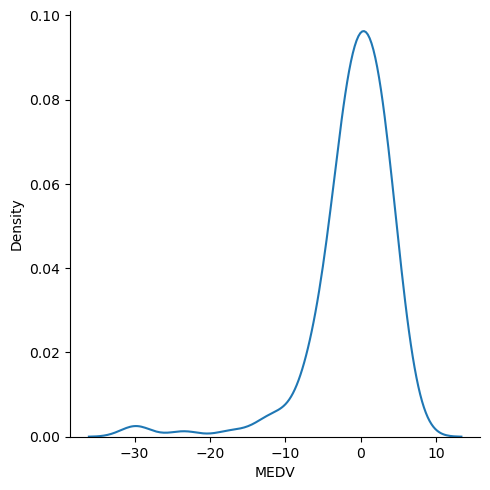

In [59]:
import seaborn as sns

sns.displot(reg_pred-y_test,kind='kde')

Here we can see the value lies between -10 to 10, which is very useful.

In [60]:
from sklearn.metrics import r2_score

In [61]:
score = r2_score(reg_pred,y_test)
score

0.5877113219960409